In [1]:
import pandas as pd

In [2]:
student= pd.read_csv('study_habits.csv')

In [3]:
student

,Study Hours,Sleep Hours,Social Media,Attendance,Past Avg Score,Final Score
0,3.85,4.46,4.65,94.10,58.48,90.41
1,1.39,7.14,4.72,95.89,52.75,74.34
2,6.52,5.57,3.75,89.37,50.61,114.94
3,3.01,5.66,2.87,75.48,81.90,93.72
4,4.15,7.85,4.24,97.61,83.77,115.23
...,...,...,...,...,...,...
9995,7.39,6.09,4.27,75.78,50.31,119.11
9996,5.25,4.00,3.62,89.17,62.15,103.60
9997,1.70,8.10,1.11,74.48,52.34,80.66
9998,4.79,8.06,2.45,91.47,68.82,117.37


In [4]:
student.loc[student['Final Score']>100,['Study Hours','Past Avg Score']].head(10)

,Study Hours,Past Avg Score
2,6.52,50.61
4,4.15,83.77
6,4.68,55.63
8,6.44,78.21
9,5.80,58.46
10,7.87,91.74
11,5.21,91.33
12,6.70,91.81
13,5.96,76.04
15,7.33,81.30


In [5]:
student.describe()

,Study Hours,Sleep Hours,Social Media,Attendance,Past Avg Score,Final Score
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.528267,5.989538,2.491706,75.330169,74.045352,105.956914
std,2.020493,1.735532,1.432755,14.393950,13.970086,20.369333
min,1.000000,3.000000,0.000000,50.010000,50.000000,49.630000
25%,2.790000,4.500000,1.240000,63.040000,61.827500,89.997500
50%,4.540000,5.980000,2.500000,75.425000,74.185000,105.960000
75%,6.260000,7.472500,3.730000,87.710000,86.332500,121.875000
max,8.000000,9.000000,5.000000,100.000000,97.990000,160.550000


In [6]:
student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Study Hours     10000 non-null  float64
 1   Sleep Hours     10000 non-null  float64
 2   Social Media    10000 non-null  float64
 3   Attendance      10000 non-null  float64
 4   Past Avg Score  10000 non-null  float64
 5   Final Score     10000 non-null  float64
dtypes: float64(6)
memory usage: 468.9 KB


In [7]:
student.corr()

,Study Hours,Sleep Hours,Social Media,Attendance,Past Avg Score,Final Score
Study Hours,1.000000,-0.016145,0.000217,-0.004801,0.010574,0.890459
Sleep Hours,-0.016145,1.000000,-0.005978,0.000840,0.004474,0.243458
Social Media,0.000217,-0.005978,1.000000,-0.004970,-0.009636,-0.145725
Attendance,-0.004801,0.000840,-0.004970,1.000000,-0.003950,0.207557
Past Avg Score,0.010574,0.004474,-0.009636,-0.003950,1.000000,0.285451
Final Score,0.890459,0.243458,-0.145725,0.207557,0.285451,1.000000


In [8]:
import seaborn as sns
import matplotlib as plt

<Axes: >

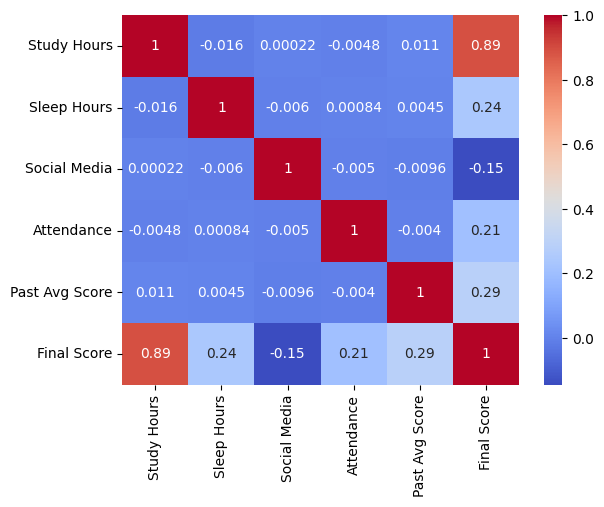

In [9]:
sns.heatmap(student.corr(), annot=True, cmap='coolwarm')

In [10]:
student.mean()

Study Hours         4.528267
Sleep Hours         5.989538
Social Media        2.491706
Attendance         75.330169
Past Avg Score     74.045352
Final Score       105.956914
dtype: float64

In [11]:
student.std()

Study Hours        2.020493
Sleep Hours        1.735532
Social Media       1.432755
Attendance        14.393950
Past Avg Score    13.970086
Final Score       20.369333
dtype: float64

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X = student[['Study Hours', 'Sleep Hours', 'Social Media', 'Attendance', 'Past Avg Score']]
y = student['Final Score']


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
# Linear Regession
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)


In [16]:
# decision tree
from sklearn.tree import DecisionTreeRegressor

In [17]:
dt= DecisionTreeRegressor(random_state= 42)
dt.fit(X_train,y_train)
y_pred_dt= dt.predict(X_test)

In [18]:
from sklearn.metrics import mean_absolute_error, r2_score

print('Linear Regression R²:  ', r2_score(y_test, y_pred_lr))
print('Decision Tree R²: ', r2_score(y_test, y_pred_dt))
print("Linear Regression MAE:", mean_absolute_error(y_test, y_pred_lr))

Linear Regression R²:   0.9999980911215697
Decision Tree R²:  0.9637390475318287
Linear Regression MAE: 0.024062669899775124


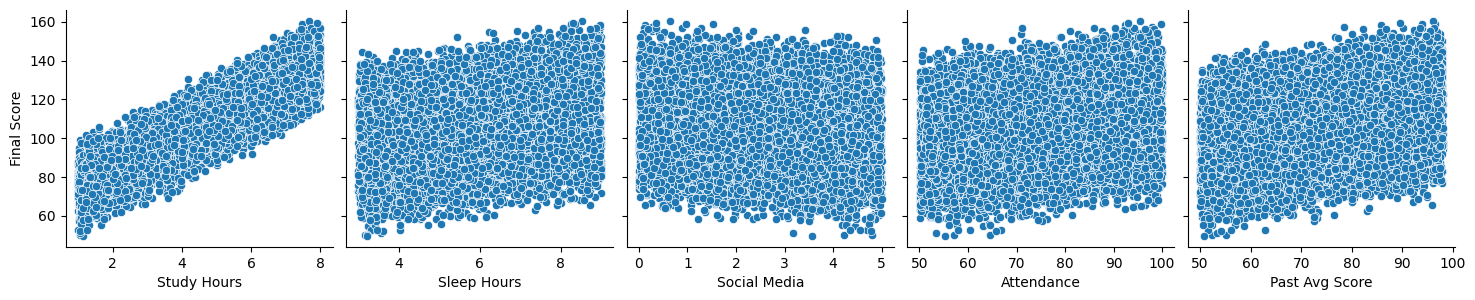

In [19]:
# Visualition 

sns.pairplot(student, 
             x_vars=['Study Hours', 'Sleep Hours', 'Social Media', 'Attendance', 'Past Avg Score'],
             y_vars='Final Score',
             height=3,
             kind='scatter')

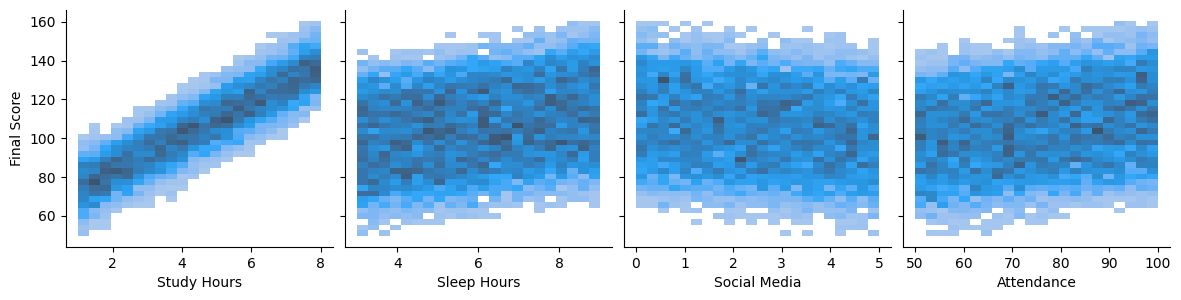

In [28]:
sns.pairplot(
    student,
    x_vars=['Study Hours', 'Sleep Hours', 'Social Media', 'Attendance'],
    y_vars='Final Score', 
    kind='hist', 
    height=3

)

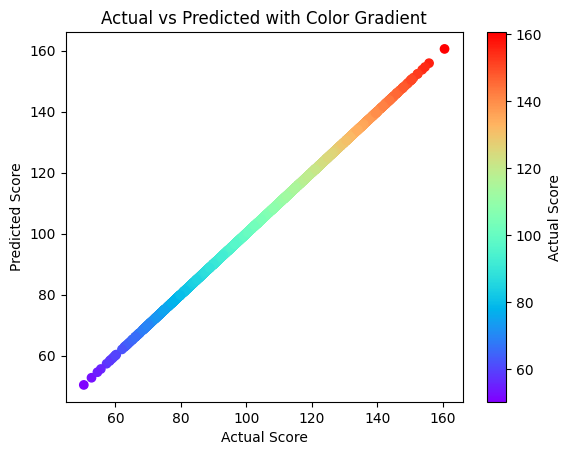

In [40]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred_lr, c=y_test, cmap='rainbow')  # we can use 'plasma', 'coolwarm', 'rainbow'..etc
plt.colorbar(label='Actual Score')  # adds color scale
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.title("Actual vs Predicted with Color Gradient")
plt.show()


In [42]:
results = X_test.copy()
results['actual_score'] = y_test
results['predicted_score'] = y_pred_lr 

In [43]:
results.to_csv('study_results.csv', index=False)

In [44]:
print("✅ Results saved as 'study_results.csv'")


✅ Results saved as 'study_results.csv'
